# Pymaceuticals Inc.
---

## Analysis

1. Most number mice were tested on Capomulin and Remicane drug.

2. As depicted in the pie chart, the distribution between sex among tested mice was equitable, with 51% male and 49% being female. This balanced distribution implies an absence of any significant correlation between sex and observed results. 

    While the initial findings suggest no discernible impact of sex on the outcomes, for a more nuanced and accurate analysis, it would be advantegeous to pursue further testing with and equal representation of both male and female mice within each regimen.

3. Based on the analysis of the line plot depicting relation between tumor volume size over the cousre of time on the Capomulin regimen, there is a descrease in size. This observation is an indicative of a potential therapeutic effect of the Capomulin regimen on reducing tumor sizes over the course of treatment.

4. The correlation coefficient, calculated as 0.84, indicates a strong positive correlation between mouse weight and tumor size. This implies that as the weight of a mouse increases, there is a tendency for the tumor to increase in volume. Ther is a tendency for larger mice to exhibit larger tumor volumes.

5. Based on the box plot it is evident that the most consistent results and the most effective drugs are Capomulin and Ramicane.
 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [96]:
# Checking the number of mice.
merged_data["Mouse ID"].value_counts()

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [97]:
# Our data should be uniquely identified by Mouse ID and Timepoint
number_of_mice = len(merged_data["Mouse ID"].value_counts())
number_of_mice

249


There is 249 mice by unique ID.

In [98]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_by_id = merged_data.groupby(["Mouse ID", "Timepoint"])
duplicate_mice = grouped_by_id.size().reset_index(name='Count')

#FIlter the rows with count grater than 1 (indicating duplicates)
duplicate_final_df = duplicate_mice[duplicate_mice["Count"]>1]
duplicate_final_df

,Mouse ID,Timepoint,Count
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [99]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes_by_id = merged_data[merged_data["Mouse ID"] == "g989"]
dupes_by_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data[merged_data["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].value_counts()

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_df.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_by_drug = cleaned_df.groupby(["Drug Regimen"])
grouped_by_drug.count().head(20)


# Assemble the resulting series into a single summary DataFrame.


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [103]:
# Continuing to calculate  mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_stat = grouped_by_drug["Tumor Volume (mm3)"].describe()
# drug_stat (printed to check the results)
# Dropping unnecessary columns for the new dataframe
tumor_stat = drug_stat.drop(columns = ["count", "min", "25%", "50%", "75%", "max"])
# Calculating statistics
variance = grouped_by_drug["Tumor Volume (mm3)"].var()
median = grouped_by_drug["Tumor Volume (mm3)"].median()
std_dev = grouped_by_drug["Tumor Volume (mm3)"].std()
sem = grouped_by_drug["Tumor Volume (mm3)"].sem()
# Adding columns to teh dataframe
tumor_stat["Tumor Volume Variance"] = variance
tumor_stat["Median Tumor Volume"] = median
tumor_stat["Tumor Volume Std. Dev."] = std_dev
tumor_stat["Tumor Volume Std. Err."] = sem

# Re-arranging the columns
tumor_stat = tumor_stat[["mean", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]]
tumor_stat.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev", "Tumor Volume Std. Err."]
tumor_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_by_drug.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

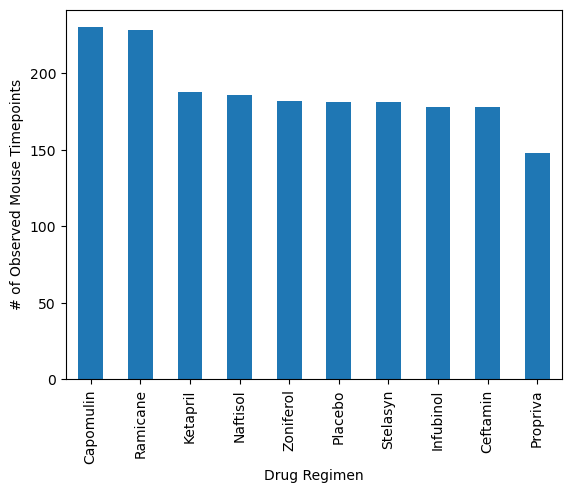

In [105]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculating the number of mice per each drug regimen
mice_count_regi = cleaned_df["Drug Regimen"].value_counts()

# Bar Plot using Pandas
mice_count_regi.plot(kind="bar")

# Adding labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


# Show plot
plt.show()

                                   

Text(0.5, 0, 'Drug Regimen')

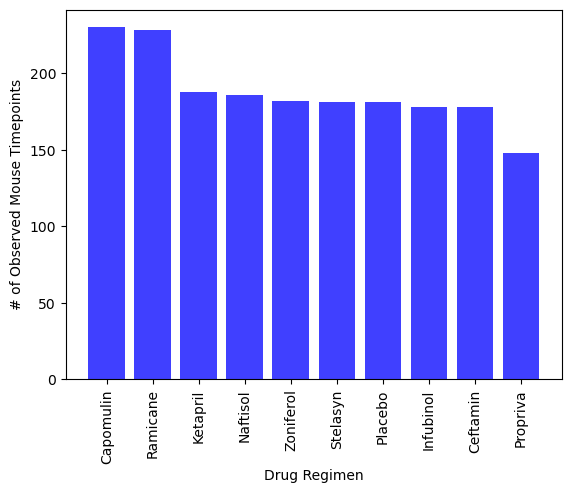

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculating the number of mice per each drug regimen
mice_count_regi = cleaned_df["Drug Regimen"].value_counts()

# Plot the bar graph
plt.bar(mice_count_regi.index, mice_count_regi, color= "blue", alpha = 0.75, align = "center")

# Setting the ticks
tick_locations = [value for value in mice_count_regi.index]
ticks = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]

plt.xticks(tick_locations, ticks, rotation=90)

plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")

(-1.0999999297639522,
 1.0999999966554264,
 -1.0999999100756188,
 1.0999999844482924)

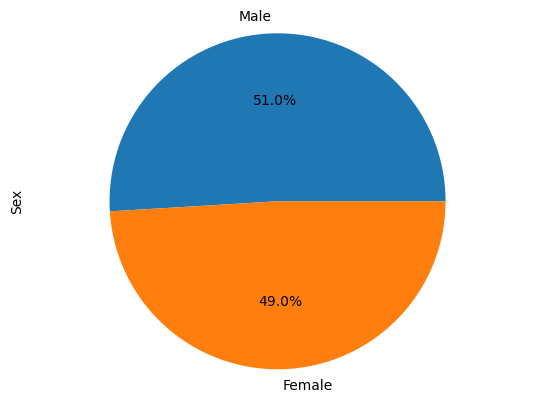

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = cleaned_df["Sex"].value_counts()
sex_df = sex.to_frame()

sex_pie_chart = sex_df.plot(kind="pie", subplots=True, legend = False, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.axis("equal")

([<matplotlib.patches.Wedge at 0x7f7b02ca22f0>,
 [Text(-0.03308201408261496, 1.0995024239828841, 'Male'),
  Text(0.0330820140826158, -1.0995024239828841, 'Female')],
 [Text(-0.018044734954153614, 0.5997285948997549, '51.0%'),
  Text(0.01804473495415407, -0.5997285948997549, '49.0%')])

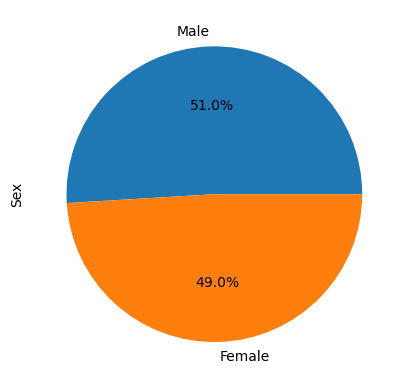

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

plt.ylabel("Sex")
plt.pie(sex, labels=labels, autopct="%1.1f%%", startangle=360)

## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (max) timepoint for each mouse
last_timepoint = merged_data.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(last_timepoint_df, merged_data, on = ["Mouse ID", "Timepoint"])
tumor_vol_df
                        

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [110]:
# Creating a list for treatments for later looping
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating empty lists for later looping (volume)
cap_tumor_volume = []
ram_tumor_volume = []
inf_tumor_volume = []
cef_tumor_volume = []

for x in range(len(tumor_vol_df)-1):
    if tumor_vol_df.loc[x, "Drug Regimen"] == "Capomulin":
        cap_tumor_volume.append(tumor_vol_df.loc[x, "Tumor Volume (mm3)"])
    if tumor_vol_df.loc[x, "Drug Regimen"] == "Ramicane":
        ram_tumor_volume.append(tumor_vol_df.loc[x, "Tumor Volume (mm3)"])
    if tumor_vol_df.loc[x, "Drug Regimen"] == "Infubinol":
        inf_tumor_volume.append(tumor_vol_df.loc[x, "Tumor Volume (mm3)"])
    if tumor_vol_df.loc[x, "Drug Regimen"] == "Ceftamin":
        cef_tumor_volume.append(tumor_vol_df.loc[x, "Tumor Volume (mm3)"])

# Creating a list of results
tumor_volume = [cap_tumor_volume, ram_tumor_volume, inf_tumor_volume, cef_tumor_volume]

# Calculating interquartiles and distinguishing if there are any potential outliers

outliers = []

for x in range(len(tumor_volume)):
    quartile = pd.Series(tumor_volume[x]).quantile([0.25, 0.5, 0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    interquartile = upper-lower
 # Determine outliers using upper and lower bounds
    lower_bound = lower - (1.5 * interquartile)
    upper_bound = upper + (1.5 * interquartile)
    potential_outliers = [value for value in tumor_volume[x] if (value < lower_bound) or (value > upper_bound)]

    print(f"\n {treatments [x]}'s potential outliers are: {potential_outliers}")


                                          


    


 Capomulin's potential outliers are: []

 Ramicane's potential outliers are: []

 Infubinol's potential outliers are: [36.3213458]

 Ceftamin's potential outliers are: []


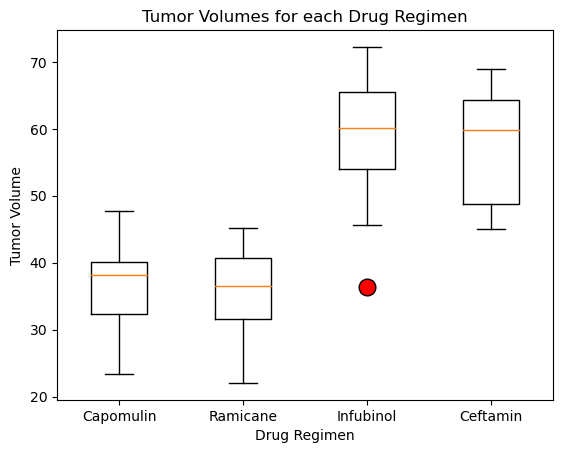

In [111]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = {
    "Capomulin": cap_tumor_volume,
    "Ramicane": ram_tumor_volume,
    "Infubinol": inf_tumor_volume,
    "Ceftamin": cef_tumor_volume,
}
# Creating a box plot
plt.boxplot(data.values(), labels = treatments, flierprops = dict(markerfacecolor = "red", marker = "o", markersize = 12))
                                                                  
plt.title("Tumor Volumes for each Drug Regimen")
plt.ylabel("Tumor Volume")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

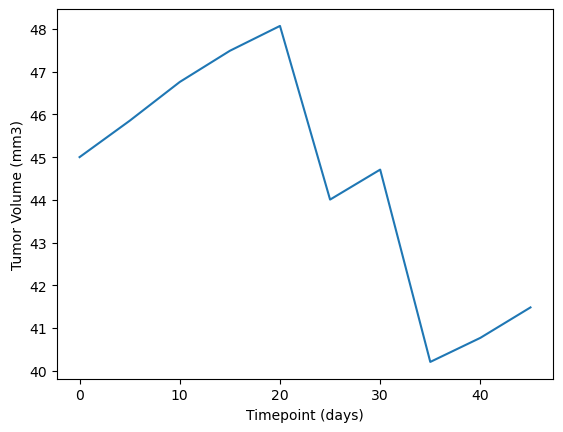

In [112]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Creating dataframe to hold results of specific drug
capomulin_df = merged_data.loc[merged_data['Drug Regimen'] == "Capomulin"]

# Filtering through to include only Mouse ID l509
mouse_id = 'l509'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

#Creating a line plot

volume_time = plt.plot(mouse_df['Timepoint'], mouse_df["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")

plt.show()

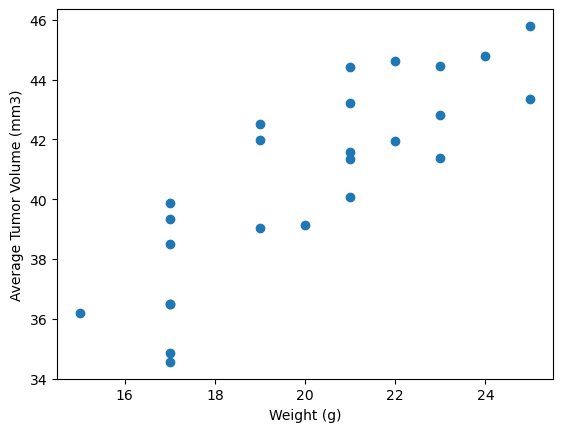

In [113]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Grouping by weight and calculating mean value of tumor volume
Capomulin_new = capomulin_df = merged_data.loc[merged_data['Drug Regimen'] == "Capomulin"].groupby("Mouse ID")

# Calculating average tumor volume
capo_ave_tumor = Capomulin_new["Tumor Volume (mm3)"].mean()
# Creating variable to hold the weight
mouse_weight = Capomulin_new["Weight (g)"].unique()

# Displaying the results
plt.scatter(mouse_weight, capo_ave_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


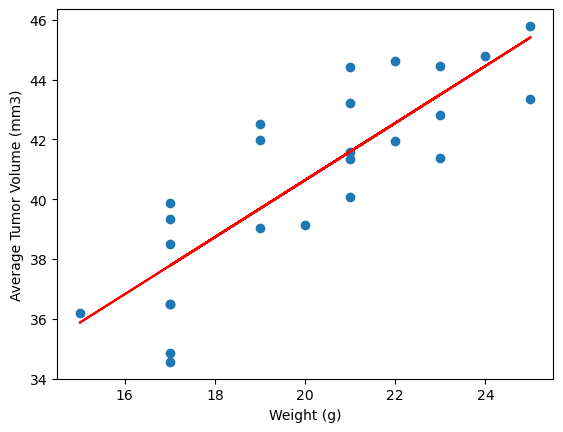

In [114]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#mouse_weight.dtype - to check and convert the type if needed.
mouse_weight = mouse_weight.astype(float)

# Calculating correlation coefficient
correlation = st.pearsonr(mouse_weight, capo_ave_tumor)

# Calculating linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, capo_ave_tumor)

# Generating y values for the regression line
regress_value = mouse_weight * slope + intercept

# Creating the equation of the line for the legend
line = 'y='+ str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plotting the scatter plot
plt.scatter(mouse_weight, capo_ave_tumor)

# Plotting the regression line and labels
plt.plot(mouse_weight, regress_value, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Printing statement
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")

plt.show()